In [13]:
import numpy as np
import tensorflow as tf
import IPython.display as display

filenames = ['monet_tfrec\monet00-60.tfrec']
raw_image_dataset = tf.data.TFRecordDataset(filenames)
raw_image_dataset


<TFRecordDatasetV2 shapes: (), types: tf.string>

In [15]:
for raw_record in raw_image_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    x = example
    print(example)

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\001,\001,\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\001\000\001\000\003\001\021\000\002\021\001\003\021\001\377\304\000\036\000\000\002\002\003\001\001\001\001\000\000\000\000\000\000\000\000\006\007\004\005\003\010\t\002\000\n\001\377\304\000K\020\000\002\001\002\004\003\005\005\004\t\003\001\007\001\t\000\003\004\005\006\023\000\002\007#\0243C\010\022\025Sc\001\"$s\203\02624\223\t\027%D\243\263\303\323\360\021B\343\363!&5ERTd\030\n1QUbrt\264\324\377\304\000\

In [21]:
# Create a description of the features.
feature_description = {
    "image": tf.io.FixedLenFeature([], tf.string),
    "image_name": tf.io.FixedLenFeature([], tf.string),
    "target": tf.io.FixedLenFeature([], tf.string),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [22]:
parsed_dataset = raw_image_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {image: (), image_name: (), target: ()}, types: {image: tf.string, image_name: tf.string, target: tf.string}>

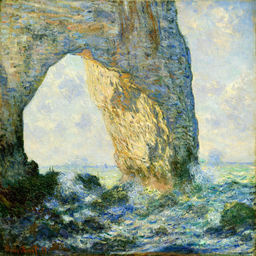

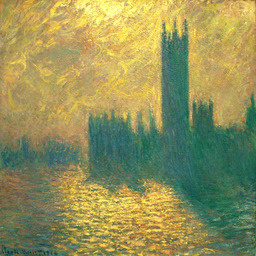

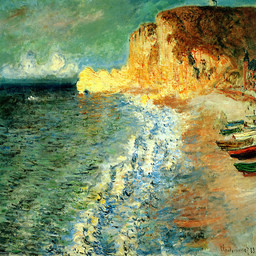

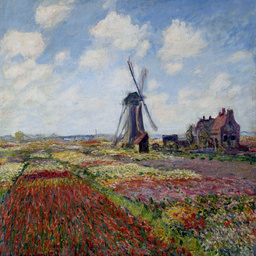

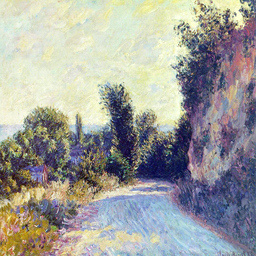

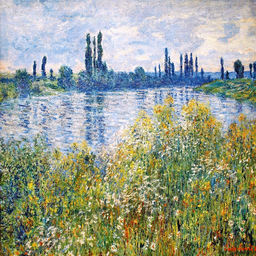

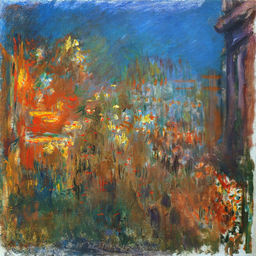

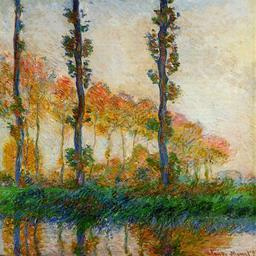

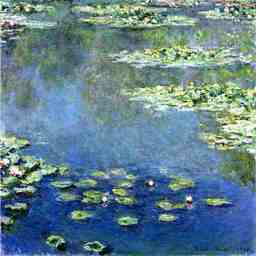

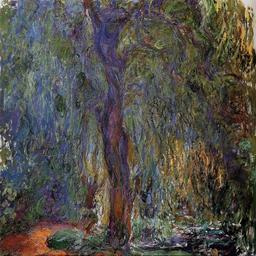

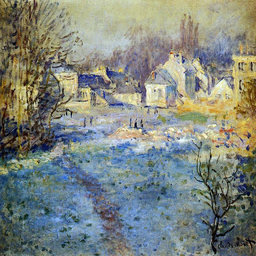

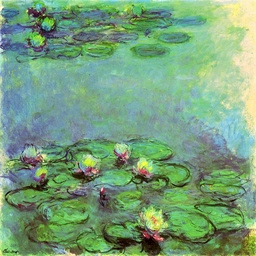

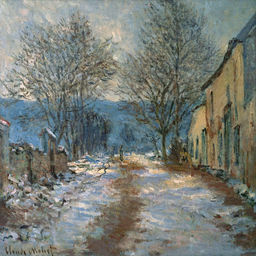

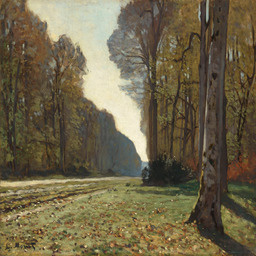

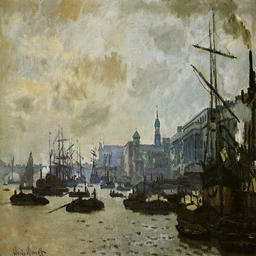

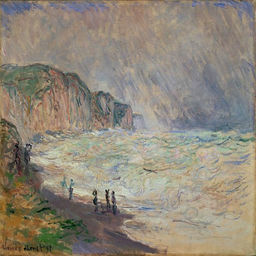

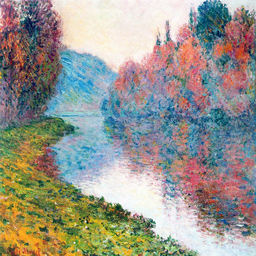

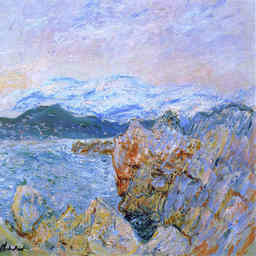

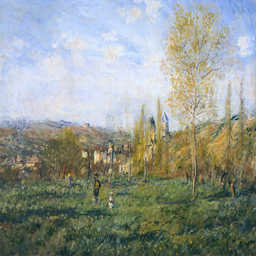

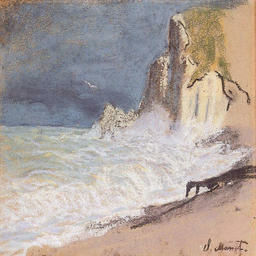

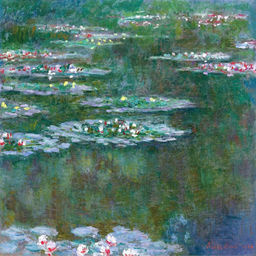

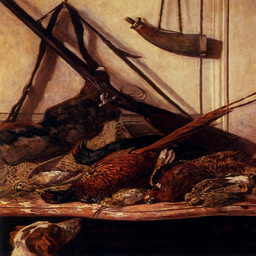

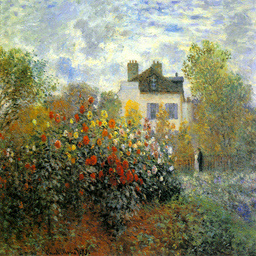

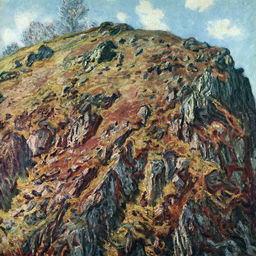

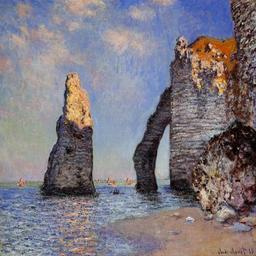

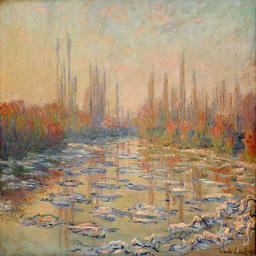

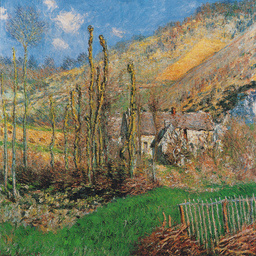

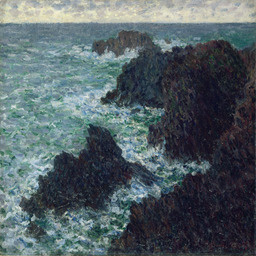

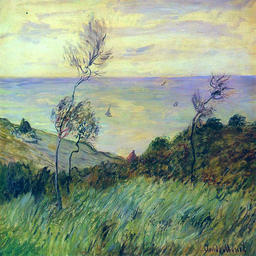

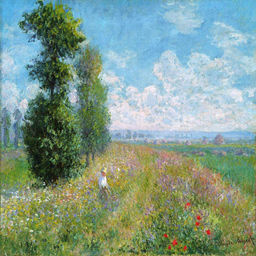

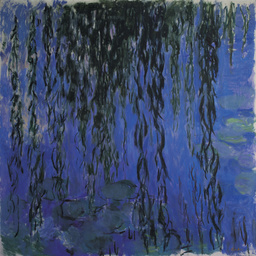

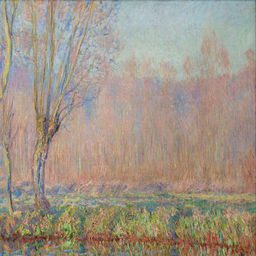

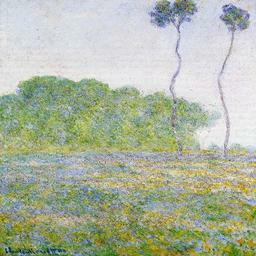

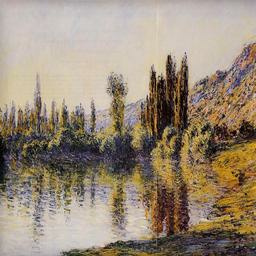

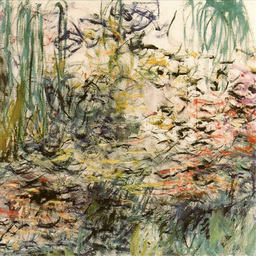

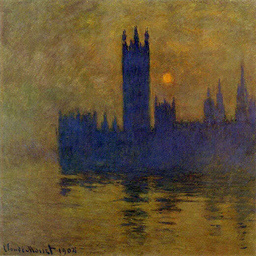

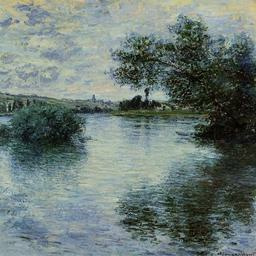

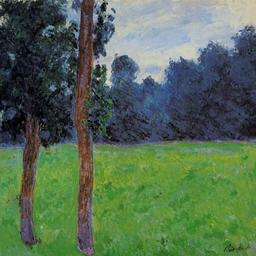

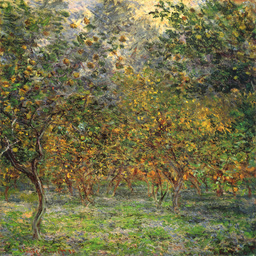

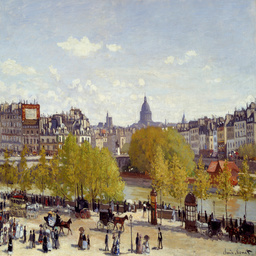

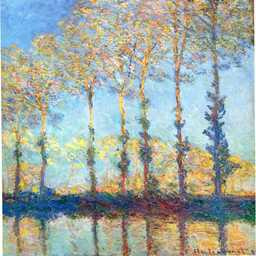

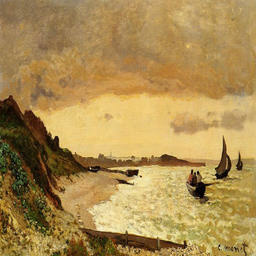

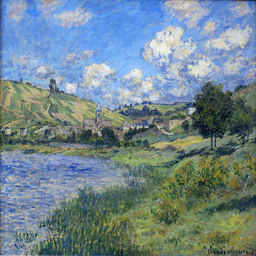

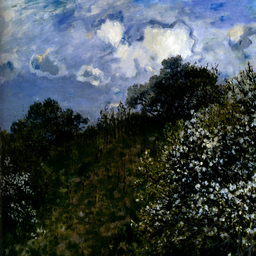

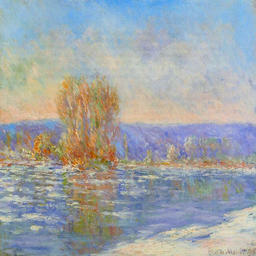

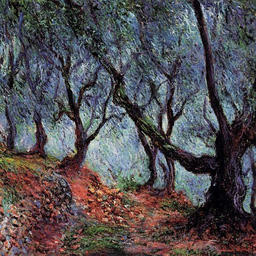

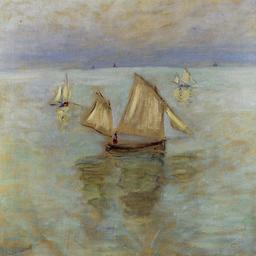

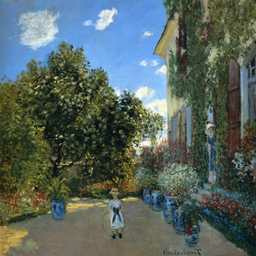

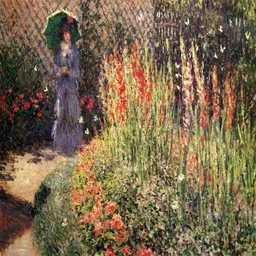

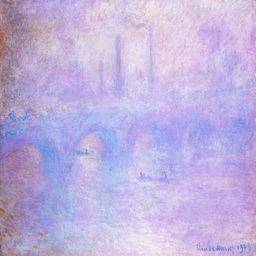

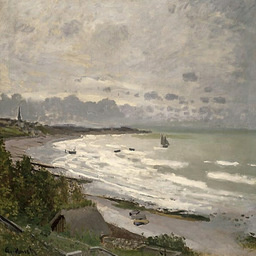

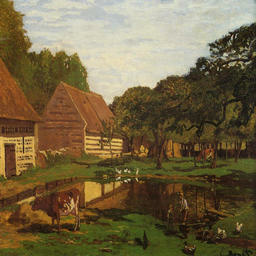

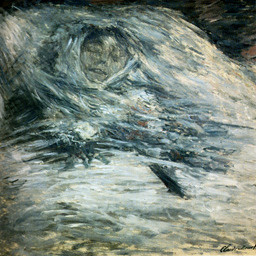

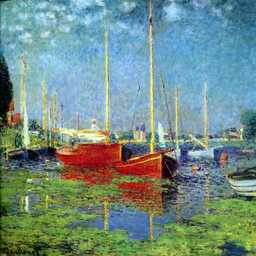

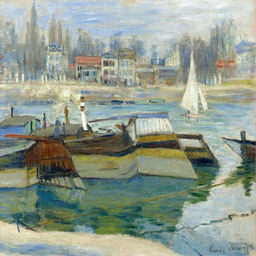

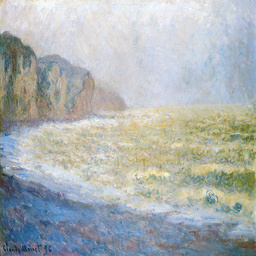

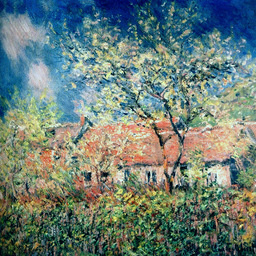

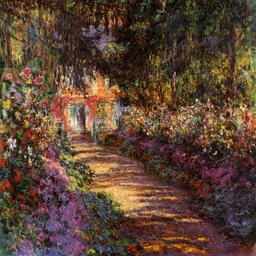

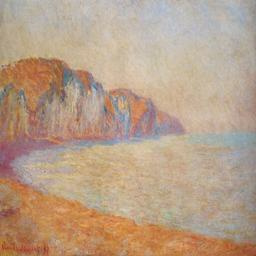

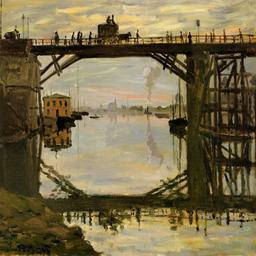

In [26]:
for image_features in parsed_dataset:
    image_raw = image_features['image'].numpy()
    display.display(display.Image(data=image_raw))